## Introduction

### Statistical thinking

The Millennium Development Goals were a set of 8 goals for 2015 that were defined by the United Nations to help improve living conditions and the conditions of our planet. Key indicators were defined for each of these goals, to see whether they were being met. We will have a look at some of the key indicators from Goal 7: Ensure environmental sustainability, namely carbon dioxide (CO2) emissions, protected land and sea areas, and forests. The full dataset can be found at http://mdgs.un.org/. 

In this dataset, the aim is to:
- find measures of central tendency and spread.
- describe different distributions and interpret a histogram.
- find outliers and how they affect measures of central tendency and spread.
- interpret correlations from a graph and from the correlation coefficient.

#### Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import scipy as sp
import scipy.special as sps
from scipy.stats import stats
from scipy.stats import sem
from scipy.stats import iqr
from scipy.stats import pearsonr
from scipy.stats import spearmanr

#### Global settings

In [2]:
sns.set(rc={'figure.figsize':(12,8), 'axes.titleweight':'bold', 'axes.labelweight':'bold'}, font_scale = 2)

## Data Exploration

#### Exploring the dataset

In [3]:
df = pd.read_csv("../data/mdg_export_20191227.csv")
df.head()

,CountryCode,Country,SeriesCode,MDG,Series,1990,Footnotes,Type,1991,Footnotes.1,...,Type.26,2017,Footnotes.27,Type.27,2018,Footnotes.28,Type.28,2019,Footnotes.29,Type.29
0,4,Afghanistan,567,Y,"Proportion of land area covered by forest, per...",2.1,NaN,E,,,...,,,,,,,,,,
1,4,Afghanistan,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",2676.9,NaN,G,2493.6,NaN,...,,,,,,,,,,
2,4,Afghanistan,616,Y,Terrestrial and marine areas protected to tota...,0.36,NaN,C,,,...,,,,,,,,,,
3,8,Albania,567,Y,"Proportion of land area covered by forest, per...",28.8,NaN,C,,,...,,,,,,,,,,
4,8,Albania,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",7488,NaN,G,3971.4,NaN,...,,,,,,,,,,


In [4]:
df.columns

Index(['CountryCode', 'Country', 'SeriesCode', 'MDG', 'Series', '1990',
       'Footnotes', 'Type', '1991', 'Footnotes.1', 'Type.1', '1992',
       'Footnotes.2', 'Type.2', '1993', 'Footnotes.3', 'Type.3', '1994',
       'Footnotes.4', 'Type.4', '1995', 'Footnotes.5', 'Type.5', '1996',
       'Footnotes.6', 'Type.6', '1997', 'Footnotes.7', 'Type.7', '1998',
       'Footnotes.8', 'Type.8', '1999', 'Footnotes.9', 'Type.9', '2000',
       'Footnotes.10', 'Type.10', '2001', 'Footnotes.11', 'Type.11', '2002',
       'Footnotes.12', 'Type.12', '2003', 'Footnotes.13', 'Type.13', '2004',
       'Footnotes.14', 'Type.14', '2005', 'Footnotes.15', 'Type.15', '2006',
       'Footnotes.16', 'Type.16', '2007', 'Footnotes.17', 'Type.17', '2008',
       'Footnotes.18', 'Type.18', '2009', 'Footnotes.19', 'Type.19', '2010',
       'Footnotes.20', 'Type.20', '2011', 'Footnotes.21', 'Type.21', '2012',
       'Footnotes.22', 'Type.22', '2013', 'Footnotes.23', 'Type.23', '2014',
       'Footnotes.24', 'Type

Since we have columns that do not contain any information, it is best to drop them.

In [5]:
df1 = df.drop(['Footnotes','Footnotes.1','Footnotes.2','Footnotes.3','Footnotes.4','Footnotes.5',
               'Footnotes.6','Footnotes.7','Footnotes.8','Footnotes.9','Footnotes.10','Footnotes.11',
               'Footnotes.12','Footnotes.13','Footnotes.14','Footnotes.15','Footnotes.16',
               'Footnotes.17','Footnotes.18','Footnotes.19','Footnotes.20','Footnotes.21',
               'Footnotes.22','Footnotes.23','Footnotes.24','Footnotes.25','Footnotes.26',
               'Footnotes.27','Footnotes.28','Footnotes.29'], axis = 1)
df1 = df1.drop(['Type','Type.1','Type.2','Type.3','Type.4','Type.5','Type.6','Type.7','Type.8',
                'Type.9','Type.10','Type.11','Type.12','Type.13','Type.14','Type.15','Type.16',
                'Type.17','Type.18','Type.19','Type.20','Type.21','Type.22','Type.23','Type.24',
                'Type.25','Type.26','Type.27','Type.28','Type.29'], axis = 1)

In [6]:
df1.head()

,CountryCode,Country,SeriesCode,MDG,Series,1990,1991,1992,1993,1994,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,4,Afghanistan,567,Y,"Proportion of land area covered by forest, per...",2.1,,,,,...,2.1,,,,,,,,,
1,4,Afghanistan,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",2676.9,2493.6,1426.5,1375.1,1320.1,...,8470.8,12251.4,,,,,,,,
2,4,Afghanistan,616,Y,Terrestrial and marine areas protected to tota...,0.36,,,,,...,,,,,0.46,,,,,
3,8,Albania,567,Y,"Proportion of land area covered by forest, per...",28.8,,,,,...,28.3,,,,,,,,,
4,8,Albania,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",7488,3971.4,2387.2,2343.2,1928.8,...,4415.1,4668.1,,,,,,,,


In [7]:
df1['Country'].nunique()

230

- 230 Countries are represented

# Finding Missing Values

Replacing empty spaces with Nan values

In [8]:
df1 = df1.replace(r'^\s*$', np.nan,regex = True)

In [9]:
df1.isnull().groupby(df1['Country']).sum().sum(axis=1)

Country
Afghanistan                                       61
Albania                                           61
Algeria                                           61
American Samoa                                    83
Andorra                                           66
                                                  ..
Western Sahara                                    83
Yemen                                             61
Yugoslavia [former Socialist Federal Republic]    88
Zambia                                            61
Zimbabwe                                          61
Length: 230, dtype: int64

In [10]:
df1.isnull().groupby(df1['Series']).sum().sum(axis=1)

Series
Carbon dioxide emissions (CO2), thousand metric tons of CO2 (CDIAC)             2325
Proportion of land area covered by forest, percentage                           6008
Terrestrial and marine areas protected to total territorial area, percentage    6231
dtype: int64

In [11]:
Years = df1.drop(['Country','CountryCode', 'SeriesCode', 'MDG', 'Series'], axis = 1)
Years.isna().sum()

1990     63
1991    508
1992    486
1993    486
1994    485
1995    483
1996    484
1997    481
1998    481
1999    481
2000     34
2001    479
2002    478
2003    478
2004    478
2005    254
2006    476
2007    475
2008    475
2009    475
2010    252
2011    475
2012    690
2013    690
2014    467
2015    690
2016    690
2017    690
2018    690
2019    690
dtype: int64

In [12]:
years = list(Years)
df1[years] = df1[years].astype(float)

### Finding the top and bottom 5 countries in terms of CO2 emissions in 1990 and their emissions

In [13]:
df1.head()

,CountryCode,Country,SeriesCode,MDG,Series,1990,1991,1992,1993,1994,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,4,Afghanistan,567,Y,"Proportion of land area covered by forest, per...",2.10,NaN,NaN,NaN,NaN,...,2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,Afghanistan,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",2676.90,2493.6,1426.5,1375.1,1320.1,...,8470.8,12251.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,Afghanistan,616,Y,Terrestrial and marine areas protected to tota...,0.36,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.46,NaN,NaN,NaN,NaN,NaN
3,8,Albania,567,Y,"Proportion of land area covered by forest, per...",28.80,NaN,NaN,NaN,NaN,...,28.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,Albania,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",7488.00,3971.4,2387.2,2343.2,1928.8,...,4415.1,4668.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
CO2 = df1.loc[df1['Series']=='Carbon dioxide emissions (CO2), thousand metric tons of CO2 (CDIAC)']
CO2.head()

,CountryCode,Country,SeriesCode,MDG,Series,1990,1991,1992,1993,1994,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,4,Afghanistan,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",2676.9,2493.6,1426.5,1375.1,1320.1,...,8470.8,12251.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,Albania,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",7488.0,3971.4,2387.2,2343.2,1928.8,...,4415.1,4668.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,12,Algeria,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",78924.8,81220.4,81935.4,82294.8,86500.9,...,119276.5,121755.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,16,American Samoa,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,20,Andorra,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",NaN,NaN,NaN,NaN,NaN,...,517.0,491.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Looking at the top and bottom countries in 1990

In [15]:
round(CO2.nlargest(5,'1990')[['Country','1990']].sort_values(by=['1990'], ascending=False),2)

,Country,1990
652,United States,4823557.1
124,China,2460744.0
301,Japan,1094287.8
277,India,690576.8
646,United Kingdom,555902.5


## Top 5 Countries

- United States
- China
- Japan
- India
- United Kingdom

In [16]:
CO2.nsmallest(5, '1990', 'last')[['Country','1990']].sort_values(by=['1990'],ascending=False)

,Country,1990
313,Kiribati,22.0
559,Somalia,18.3
505,Saint Helena,7.3
445,Niue,3.7
679,Yemen,-2999.6


## Bottom 5 Countries

- Kiribati
- Somalia
- Saint Helena
- Niue
- Yemen

Seeing that Yemen has a negative CO2 emission value of -2999.6, it simply means Yemen is Carbon Negative, meanwhile; Carbon negative means, in effect, that you emit less than zero carbon dioxide and carbon dioxide equivalent (CO2e) greenhouse gasses.

In [17]:
CO2=CO2.replace(-2999.600000, 2999.6)

- Replacing the negative value for proper computation of log scale since log10 regards negative values as invalid, however changing this value to a positive does not affect or make any noticable change to the data.

### Looking at how this has changed in 2011

## Top 5 Countries

In [18]:
CO2.nlargest(5,'2011')[['Country','2011']].sort_values(by=['2011'], ascending=False)

,Country,2011
124,China,9019518.2
652,United States,5305569.6
277,India,2074344.9
499,Russian Federation,1808073.0
301,Japan,1187657.0


## Bottom 5 Countries

In [19]:
CO2.nsmallest(5,'2011')[['Country','2011']].sort_values(by=['2011'], ascending=False)

,Country,2011
346,Liechtenstein,51.3
418,Nauru,51.3
673,Wallis and Futuna Islands,25.7
445,Niue,11.0
505,Saint Helena,11.0


#### There is only one country that is nolonger part of the Top 5 in 2011 with reference to 1990. This country is:
- United Kingdom

#### There are three countries that are no longer part of the bottom 5 in 2011 with reference to 1990. These countries are:
- Kiribati
- Somalia
- Yemen

- There are no problems with the data.

### The mean and median CO2 emissions for 1990.

In [20]:
round(CO2['1990'].mean(),2)

91078.15

- The Mean value is: 91078.15

In [21]:
CO2['1990'].median()

3017.9

- The Median value is: 3017.9

- The distribution that is expected from the values of the mean and median is a distrubution that is skewed to the right since it has been statistically proven that a distribution that is skewed to the right means that the Mean is greater than the Median 

### Calculations of the minimum, maximum and interquartile range of the CO2 emissions for 1990. Using this information, and the mean and median, there will be an explanation of what it says about the distribution of CO2 emissions.

In [22]:
CO2['1990'].describe()

count    1.810000e+02
mean     9.107815e+04
std      4.167407e+05
min      3.700000e+00
25%      5.574000e+02
50%      3.017900e+03
75%      4.219620e+04
max      4.823557e+06
Name: 1990, dtype: float64

In [23]:
CO2['1990'].min()

3.7

In [24]:
CO2['1990'].max()

4823557.1

In [25]:
Q3,Q1 = CO2['1990'].quantile(0.75), CO2['1990'].quantile(0.25)
IQR = Q3 - Q1
round(IQR,2)

41638.8

- The Minimum value of the CO2 emmisions for 1990 is: 3.7
- The Maximum value of the CO2 emmisions for 1990 is: 4823557.1
- The Interquatile range (IQR) of the CO2 emmisions for 1990 is: 41638.8

In [26]:
round(CO2['1990'].std(),2)

416740.74

The standard deviation is: 416740.74

- A high standard deviation indicates data are more spread out as opposed to being clustered around the mean

### A histogram of the CO2 emissions for 1990. 

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'CO2 emissions for 1990 [log]'),
 Text(0.5, 1.0, 'Histogram')]

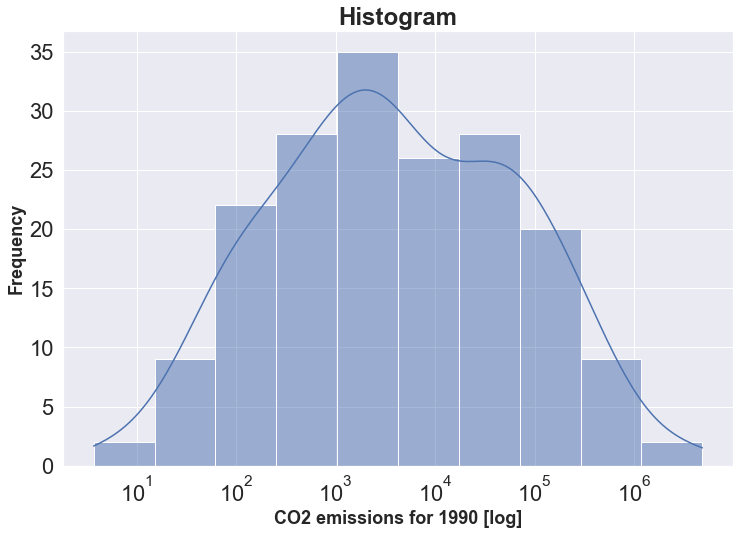

In [53]:
graph_1990 = sns.histplot(CO2['1990'], bins=10, kde=True, log_scale=True)
graph_1990.set(ylabel='Frequency', xlabel='CO2 emissions for 1990 [log]', title='Histogram')

- This graph representation is what I expected since it is clear from the Histogram that this distribution is a bit skewed to the right which validates that the mean is greater than the median. Moreover, the data in the distribution is more spread out which validates the high value of the standard deviation.

### Calculations of the standard deviation and standard error of the mean for CO2 emissions in 1990 together with an explanation of how the standard error is different from the standard deviation.

In [28]:
round(CO2['1990'].std(), 2)

416740.74

The standard deviation of the mean for CO2 emissions in 1990 is: 416740.74

In [29]:
round(CO2['1990'].sem(), 2)

30976.1

The standard error of the mean for CO2 emissions in 1990 is: 30976.1

- Standard Deviation - is defined as an absolute measure of dispersion of a series. It clarifies the standard amount of variation on either side of the mean.
- Standard Error - is used to measure the statistical accuracy of an estimate. It is primarily used in the process of testing hypothesis and estimating interval.

### Creating a line graph to show CO2 emissions in Brazil, Russia, China, India, the USA and South Africa over time and describing what the graph tells us about the difference and change in C02 emissions in these countries

#### Getting country code

In [30]:
brazil = CO2["Country"][CO2["Country"] == "Brazil"]
russia = CO2["Country"][CO2["Country"] == "Russian Federation"]
china = CO2["Country"][CO2["Country"] == "China"]
india = CO2["Country"][CO2["Country"] == "India"]
usa = CO2["Country"][CO2["Country"] == "United States"]
south_africa = CO2["Country"][CO2["Country"] == "South Africa"]

display(brazil, russia, china, india, usa, south_africa)

82    Brazil
Name: Country, dtype: object

499    Russian Federation
Name: Country, dtype: object

124    China
Name: Country, dtype: object

277    India
Name: Country, dtype: object

652    United States
Name: Country, dtype: object

562    South Africa
Name: Country, dtype: object

In [31]:
selected_countries = df1.loc[(82,499,124,277,652,562),("Country",
                                                       "1990","1991","1992","1993","1994","1995",
                                                       "1996","1997","1998","1999","2000","2001",
                                                       "2002","2003","2004","2005","2006","2007",
                                                       "2008","2009","2010","2011")]

CO2_all_years = selected_countries.groupby("Country")[["1990","1991","1992","1993","1994","1995",
                                                       "1996","1997","1998","1999","2000","2001",
                                                       "2002","2003","2004","2005","2006","2007",
                                                       "2008","2009","2010","2011"]].apply(lambda 
                                                         Country : Country.sum()).reset_index()

CO2_all_years

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Brazil,208887.0,219330.6,220705.7,230738.6,242154.0,258347.5,284782.9,300547.3,312289.1,...,332266.9,321621.6,337826.0,347308.9,347668.3,363212.7,387675.2,367147.4,419754.2,439412.9
1,China,2460744.0,2584538.3,2695982.1,2878694.0,3058241.3,3320285.2,3463089.1,3469510.0,3324344.5,...,3694242.1,4525177.0,5288166.0,5790017.0,6414463.1,6791804.7,7035443.9,7692210.9,8256969.2,9019518.2
2,India,690576.8,737851.7,783634.2,814297.7,864931.6,920046.6,1002224.1,1043939.9,1071911.8,...,1226791.2,1281913.5,1348524.6,1411127.6,1504364.7,1611199.1,1793075.0,1965820.0,1950950.3,2074344.9
3,Russian Federation,0.0,0.0,2081840.2,1941203.5,1701132.3,1634312.2,1615804.9,1528849.3,1498343.5,...,1557660.9,1604968.9,1602955.7,1615687.5,1669618.1,1667597.6,1715639.0,1574367.8,1742540.1,1808073.0
4,South Africa,319795.4,332618.9,307822.6,321104.5,337576.7,353458.5,358639.9,371327.8,372218.8,...,347686.6,380810.6,424774.3,391819.0,422445.7,440989.8,469090.0,477806.4,454950.0,477241.7
5,United States,4823557.1,4822383.7,4911103.1,5032931.8,5098475.8,5138009.7,5260696.5,5375235.3,5410918.9,...,5648727.5,5679222.2,5763456.9,5795161.8,5703871.8,5794923.4,5622464.4,5274132.4,5408869.0,5305569.6


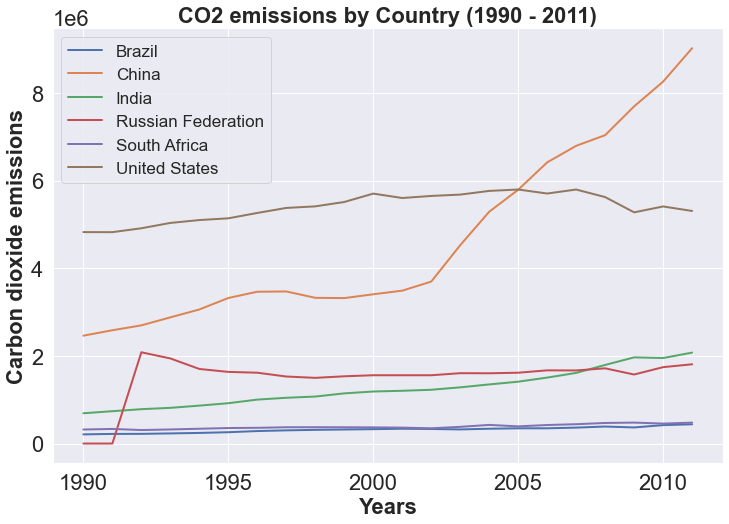

In [32]:
line_graph = CO2_all_years.set_index("Country").T
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('CO2 emissions by Country (1990 - 2011)', fontsize = 22, weight='bold')
ax.set_xlabel('Years', fontsize = 22, weight='bold')
ax.set_ylabel('Carbon dioxide emissions', fontsize = 22, weight='bold')
line_graph.plot(ax=ax, linewidth=2)
plt.legend(loc=2, prop={'size': 17})
plt.show()

### Insights

- From 2012 - 2019, the dataset does not seem to have enough information to be represented on this line graph which is why the displayed representation of CO2 emissions ends in the year 2011. 

- It is quite evident that from the graph that Countries like South Africa and Brazil have managed to keep their carbon dioxide emissions at a steady and low rate compared to other countries like China and the United States which have very high carbon dioxide emissions. 

- India and the Russian Federation are at almost the same level in terms emissions but still have high carbon dioxide emissions than South africa and Brazil

### The mean and standard deviation for land area covered by forest in 1990 and the reason why the standard deviation is so large

In [33]:
forest_area = df1.loc[df1["SeriesCode"] == 567]
forest_area.head(2)

,CountryCode,Country,SeriesCode,MDG,Series,1990,1991,1992,1993,1994,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,4,Afghanistan,567,Y,"Proportion of land area covered by forest, per...",2.1,NaN,NaN,NaN,NaN,...,2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,Albania,567,Y,"Proportion of land area covered by forest, per...",28.8,NaN,NaN,NaN,NaN,...,28.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
forest_area.loc[:, ('Country','1990')]
round(forest_area['1990'].mean(),2)

32.98

The Mean of the area covered by forest in 1990: 32.98

In [35]:
round(forest_area['1990'].std(),2)

25.5

The Standard deviation of the area covered by forest in 1990: 25.5

- The Standard deviation is large due to data being more spread out

In [36]:
protected_area = df1.loc[df1["SeriesCode"] == 616]
protected_area = protected_area.replace(0, 0.0001)
protected_area = protected_area.interpolate(method='linear', axis=0).ffill().bfill()
protected_area.head(2)

,CountryCode,Country,SeriesCode,MDG,Series,1990,1991,1992,1993,1994,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
2,4,Afghanistan,616,Y,Terrestrial and marine areas protected to tota...,0.36,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.46,NaN,NaN,NaN,NaN,NaN
5,8,Albania,616,Y,Terrestrial and marine areas protected to tota...,0.15,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.91,NaN,NaN,NaN,NaN,NaN


### Histograms for land area covered by forest and percentage of area protected in 1990

[Text(0.5, 0, 'Forest'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Histogram for Forested Land')]

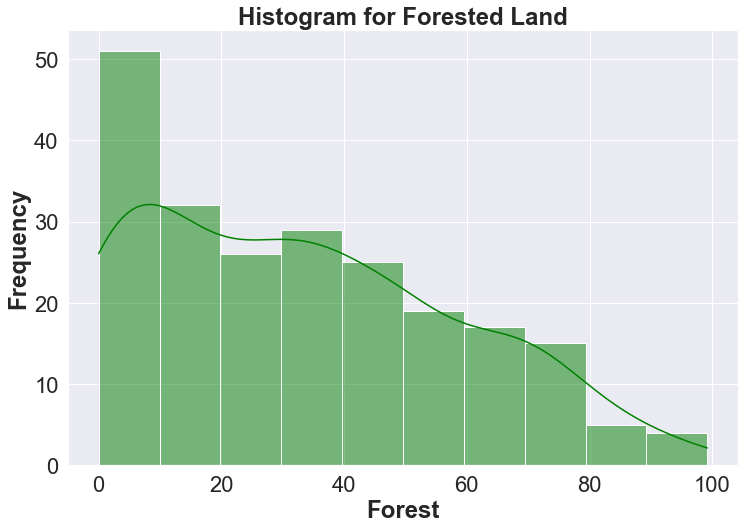

In [37]:
f_1990 = sns.histplot(forest_area['1990'], bins=10, kde=True, color='green')
f_1990.set(xlabel='Forest', ylabel='Frequency', title='Histogram for Forested Land')

[Text(0.5, 0, 'Protected'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Histogram for Protected Land')]

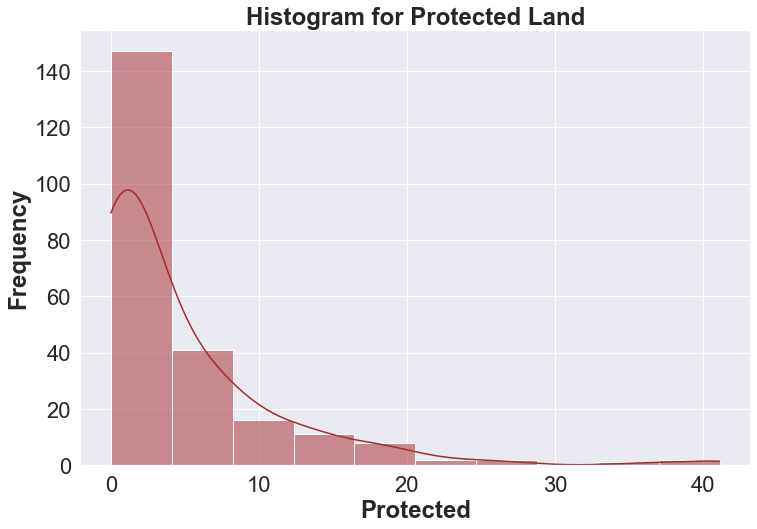

In [38]:
p_1990 = sns.histplot(protected_area['1990'], bins=10, kde=True, color='brown')
p_1990.set(xlabel='Protected', ylabel='Frequency', title='Histogram for Protected Land')

### Insights

- Both graphs have a positively skewed distribution.
- The histogram representing the Protected area is extremely indicative of an exponential distribution, the distribution shows that the peak was from 0 to 10 percent in the year 1990, by interpreting this we can conclude that in 1990, 0 to 10 percent of the land in many countries was protected.
- The histogram representing the Land covered by forest shows a positively skewed distribution as it is clear that most values are situated on the left side of the histogram.

###  Scatterplot with a regression line to show the relationship between the proportion of land area covered by forest and the percentage of area protected in 2000.

In [39]:
forest_2000 = forest_area.groupby('Country')['2000'].sum()
protected_2000 = protected_area.groupby('Country')['2000'].sum()

In [40]:
merged = pd.concat([forest_2000, protected_2000],axis=1)
merged.head()

,2000,2000
Country,,
Afghanistan,2.1,0.36
Albania,28.1,0.48
Algeria,0.7,5.98
American Samoa,90.0,0.06
Andorra,35.6,9.25


#### Renaming the columns

In [41]:
merged.columns = ['forest 2000', 'protected 2000']
merged.head()

,forest 2000,protected 2000
Country,,
Afghanistan,2.1,0.36
Albania,28.1,0.48
Algeria,0.7,5.98
American Samoa,90.0,0.06
Andorra,35.6,9.25


In [42]:
merged['protected 2000'].min()

0.0001

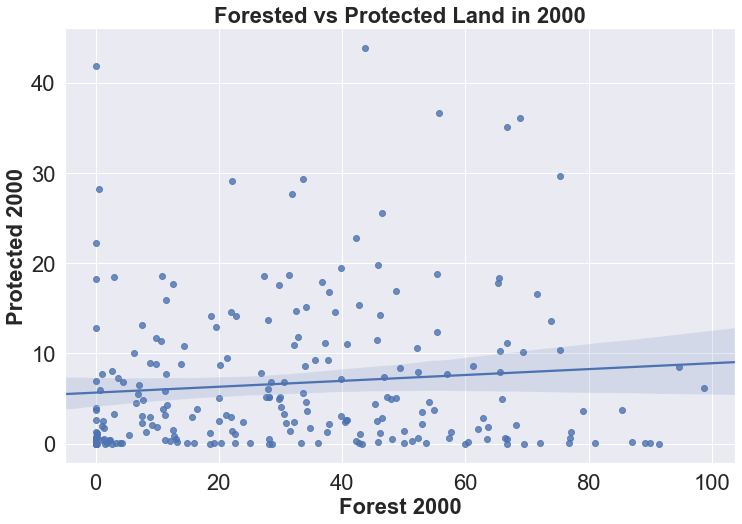

In [43]:
plt.figure(figsize=(12,8))
plt.rcParams['axes.labelsize'] = (18)
sns.regplot(x=merged['forest 2000'], y=merged['protected 2000'], data=merged, truncate=False)
_ = plt.title('Forested vs Protected Land in 2000', fontsize=22, weight='bold')
_ = plt.xlabel('Forest 2000', fontsize=22, weight='bold')
_ = plt.ylabel('Protected 2000', fontsize=22, weight='bold')

#### Description of the relationship between these two variables ("protected 2000" and "forest 2000")
- These variables have a weak positive linear relationship

#### Patterns in the scatterplot
- The pattern here is difficult to describe, but the variables are not moving simultaneously at the same time, 
  these variables are moving in the same direction
- Looking at the graph, it is clear that there are extreme values that aren't fitting or do not fit the general trend, these values are called outliers 

#### Defining outliers
- Outliers are defined as abnormal values in a dataset that don’t go with the regular distribution and have the potential to significantly distort any regression model

#### There are different types of outliers:
- Global Outliers - A data point is considered a global outlier if its value is far outside the entirety of the data set in which it is found 
- Contextual (Conditional) Outliers - Contextual outliers are data points whose value significantly deviates from other data within the same context
- Collective Outliers - A subset of data points within a data set is considered anomalous if those values as a collection deviate significantly from the entire data set, but the values of the individual data points are not themselves anomalous in either a contextual or global sense

### Since neither forested land area nor protected area is normally distributed, we will need to log transform these variables in order to calculate a correlation coefficient. Log transform the variables and show the transformed distributions in a histogram.

In [44]:
forest_1990 = forest_area.groupby('Country')['1990'].sum()
protected_1990 = protected_area.groupby('Country')['1990'].sum()

In [45]:
merged = pd.concat([forest_1990, protected_1990],axis=1)
merged = merged.replace(0.0, 0.0001)
merged.head()

,1990,1990
Country,,
Afghanistan,2.1,0.36
Albania,28.8,0.15
Algeria,0.7,5.97
American Samoa,90.0,0.06
Andorra,35.6,5.53


In [46]:
merged.columns = ['forest 1990', 'protected 1990']


In [47]:
log_transform = merged[['forest 1990','protected 1990']].apply(np.log)
log_transform

,forest 1990,protected 1990
Country,,
Afghanistan,0.741937,-1.021651
Albania,3.360375,-1.897120
Algeria,-0.356675,1.786747
American Samoa,4.499810,-2.813411
Andorra,3.572346,1.710188
...,...,...
Western Sahara,0.993252,-9.210340
Yemen,0.000000,-9.210340
Yugoslavia [former Socialist Federal Republic],-9.210340,2.891762


In [48]:
log_trans = log_transform[~log_transform.isin([np.nan, np.inf, -np.inf])]
log_trans

,forest 1990,protected 1990
Country,,
Afghanistan,0.741937,-1.021651
Albania,3.360375,-1.897120
Algeria,-0.356675,1.786747
American Samoa,4.499810,-2.813411
Andorra,3.572346,1.710188
...,...,...
Western Sahara,0.993252,-9.210340
Yemen,0.000000,-9.210340
Yugoslavia [former Socialist Federal Republic],-9.210340,2.891762


[Text(0.5, 0, 'Forested'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Forested Land (Transformed distribution)')]

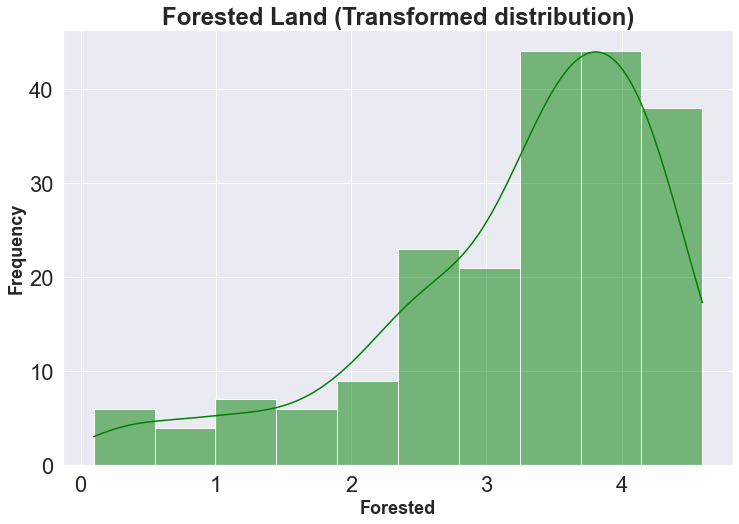

In [49]:
f_log_1990 = sns.histplot(log_trans[log_trans['forest 1990']>0]['forest 1990'], 
                          bins=10, kde=True, color='green')
f_log_1990.set(xlabel='Forested', ylabel='Frequency', title="Forested Land (Transformed distribution)")

[Text(0.5, 0, 'Protected'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Protected Land (Transformed distribution)')]

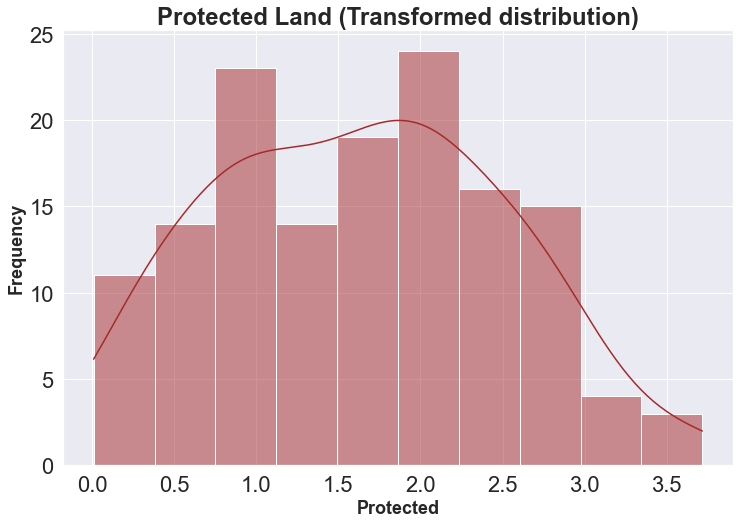

In [50]:
p_log_1990 = sns.histplot(log_trans[log_trans['protected 1990']>0]['protected 1990'],
                          bins=10, kde=True, color='brown')
p_log_1990.set(xlabel='Protected', ylabel='Frequency', title="Protected Land (Transformed distribution)")

### Insights
- Forested Land graph is a representation of a negatively skewed distribution as it can be seen on the graph that there are more values on the right side of the graph. 
- Protected Land graph is slighty close to being a representation of a normal distribution since we can see from the graph that there are more values around the center than there are towards the left and right sides of the graph.  

## Hypothesis Test

#### Null Hypothesis: 
- There is no statistically significant linear relationship between area covered by forest and land protected.

#### Alternative Hypothesis: 
- There is a statistically significant linear relationship between area covered by forest and land protected.  

### Calculating the Pearson correlation coefficient (and its corresponding p value) to determine the nature of the relationship between proportion of land area covered by forest and the percentage of area protected (as measured in 1990 and log transformed)

In [51]:
pearsonr(log_trans['forest 1990'], log_trans['protected 1990'])

(0.18034578732922468, 0.0060935905672030635)

#### Pearson's correlation coefficient
- Pearson's correlation coefficient is the covariance of the two variables divided by the product of their standard deviations

#### P-value
- A p-value is a statistical measurement used to validate a hypothesis against observed data.
- A p-value measures the probability of obtaining the observed results, assuming that the null hypothesis is true.
- The lower the p-value, the greater the statistical significance of the observed difference.

#### Interpreting the size and direction of the correlation statistic.

#### Size
- Generally, the greater the absolute value of the Pearson correlation coefficient, the stronger the relationship, in this case we have a positive pearsonr value of 0.18 after tranformation which is closer to 0, moreover a coefficient of zero represents no linear relationship which simply indicates that as one variable increases, there is no tendency in the other variable to either increase or decrease, so there is little to no linear relationship.

#### Direction
- As this outcome has a positive but close to 0 coefficient, it indicates that when the value of one variable increases, the value of the other variable also tends to increase. Positive relationships produce an upward slope on a scatterplot.

#### Signficance
- AFTER LOG TRANSFORMATION: pvalue is smaller than the significance level of 0.05 which makes the pvalue significant at a value of 0.006, this indicates strong evidence against the null hypothesis, therefore we reject the null hypothesis in favour of Alternate hypothesis. We can conclude that there is a linear relationship between protected land and forested land.

### Calculating the Spearman Rank-Order Correlation Coefficient. This test only looks at the order of the categories, not the values. The Spearman Rank-Order Coefficient is therefore not influenced by non-normality of variables or outliers.

In [52]:
spearmanr(log_trans['forest 1990'], log_trans['protected 1990'])

SpearmanrResult(correlation=0.07665809022898588, pvalue=0.24688526356961707)

#### Spearman's correlation coefficient
- Spearman's correlation coefficient, measures the strength and direction of association between two ranked variables

#### Interpretation
- The closer the spearmans correlation coefficient is to zero, the weaker the association between the ranks. It is clear that the computed value here is very close to 0 which validates a weak association between the ranks.
- A p-value of 0.05 or lower is generally considered statistically significant, in this case we have obtained a value of 0.24 which is greater than the statistically significant 0.05, it means that this p-value is not statistically significant and we fail to reject the null hyothesis leading to a conclusion that there is not enough evidence to conclude that there is a linear relationship between protected land and forested land.  

### Conclusion

- In conclusion of the above analysis, after examining the data we were able to establish that the United States and China are the top 2 countries that contribute the most to Carbon Dioxide emissions. The Carbon Dioxide emissions in these countries kept increasing from 1990 to 2011 as represented by "CO2 emissions by Country (1990 - 2011)" line graph. 
- The pearsonr value was calculated after log transformation, and the pvalue came out significant by a value lower than the significance level.
- The Spearmanr value was calculated and the pvalue came out nonsignificant by a value greater than the significance level.
- It was also discovered during the pearsonr calculations that there is a linear relationship between Forested and Protected land. 